### Objective of this Notebook:

* How to mark invalid or corrupt values as missing in your dataset.
* How to confirm that the presence of marked missing values 
* How to remove rows with missing data from your dataset.

### Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#for high resoultion graphs
from IPython.display import set_matplotlib_formats, display
set_matplotlib_formats('svg')

In [56]:
#load the data
df = pd.read_csv("pima-indians-diabetes.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
#statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
1,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
2,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
3,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
4,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
5,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
6,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
7,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
8,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


https://github.com/GouthamKumar-R/Datasets/blob/master/pima-indians-diabetes.names

Specifically, the following columns have an invalid zero minimum value:
 1. Plasma glucose concentration
 2. Diastolic blood pressure
 3. Triceps skinfold thickness
 4. 2-Hour serum insulin
 5. Body mass index
 

1      5
2     35
3    227
4    374
5     11
dtype: int64


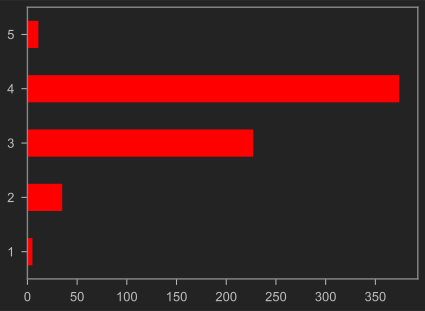

In [58]:
#count the no. of missing values foor ecah column
missing = (df[[1,2,3,4,5]] == 0).sum()
print(missing)
missing.plot(kind='barh',figsize=(7,5), color='Red', fontsize=13)
plt.show()

In [59]:
# How to mark invalid or corrupt values as missing in your dataset
#replace 0 with Nan; so that we can use isnull and drop na later on
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0,np.nan)
df.head(10)

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [60]:
# How to confirm that the presence of marked missing values causes problems for learning algorithms
#all the zeros have been converted to nan
df.isnull().sum()

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64

In [62]:
#Remove rows with missing value : complete case
print("Dimensionality of the Original data:\n ",df.shape)
df2 = df.dropna()
print("Dimensionality of the data after dropping missing values:\n ",df2.shape)

Dimensionality of the Original data:
  (768, 9)
Dimensionality of the data after dropping missing values:
  (392, 9)
